# AirBnB NY Locations Data Case Study

In this final project, your task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# How many neighbourhood groups / which shows up the most
air_bnb.groupby('neighbourhood_group').count()['id'].sort_values(ascending=False)

# 5 neighbourhood groups, Manhattan shows up the most

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: id, dtype: int64

In [9]:
air_bnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
# Are private rooms the most popular in Manhattan?
air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan'].groupby('room_type').count()

# No, entire home/apt are the most popular in Manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
Entire home/apt,13199,13193,13199,13196,13199,13199,13199,13199,13199,13199,13199,9967,9967,13199,13199
Private room,7982,7979,7982,7976,7982,7982,7982,7982,7982,7982,7982,6309,6309,7982,7982
Shared room,480,480,480,480,480,480,480,480,480,480,480,356,356,480,480


In [13]:
air_bnb.groupby(['neighbourhood_group', 'room_type']).count()

id   name  host_id  host_name  \
neighbourhood_group room_type                                           
Bronx               Entire home/apt    379    379      379        378   
                    Private room       652    652      652        652   
                    Shared room         60     59       60         60   
Brooklyn            Entire home/apt   9559   9558     9559       9554   
                    Private room     10132  10127    10132      10128   
                    Shared room        413    413      413        413   
Manhattan           Entire home/apt  13199  13193    13199      13196   
                    Private room      7982   7979     7982       7976   
                    Shared room        480    480      480        480   
Queens              Entire home/apt   2096   2096     2096       2096   
                    Private room      3372   3372     3372       3370   
                    Shared room        198    198      198        198   
Staten Island       Entire home/apt    176    176      176        176   
                    Private room       188    188      188        188   
                    Shared room          9      9        9          9   

                                     neighbourhood  latitude  longitude  \
neighbourhood_group room_type                                             
Bronx               Entire home/apt            379       379        379   
                    Private room               652       652        652   
                    Shared room                 60        60         60   
Brooklyn            Entire home/apt           9559      9559       9559   
                    Private room             10132     10132      10132   
                    Shared room                413       413        413   
Manhattan           Entire home/apt          13199     13199      13199   
                    Private room              7982      7982       7982   
                    Shared room                480       480        480   
Queens              Entire home/apt           2096      2096       2096   
                    Private room              3372      3372       3372   
                    Shared room                198       198        198   
Staten Island       Entire home/apt            176       176        176   
                    Private room               188       188        188   
                    Shared room                  9         9          9   

                                     price  minimum_nights  number_of_reviews  \
neighbourhood_group room_type                                                   
Bronx               Entire home/apt    379             379                379   
                    Private room       652             652                652   
                    Shared room         60              60                 60   
Brooklyn            Entire home/apt   9559            9559               9559   
                    Private room     10132           10132              10132   
                    Shared room        413             413                413   
Manhattan           Entire home/apt  13199           13199              13199   
                    Private room      7982            7982               7982   
                    Shared room        480             480                480   
Queens              Entire home/apt   2096            2096               2096   
                    Private room      3372            3372               3372   
                    Shared room        198             198                198   
Staten Island       Entire home/apt    176             176                176   
                    Private room       188             188                188   
                    Shared room          9               9                  9   

                                     last_review  reviews_per_month  \
neighbourhood_group room_type                                         
Br

In [29]:
air_bnb[air_bnb['reviews_per_month'].notna()].sort_values('reviews_per_month').tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299


In [30]:
# Who are the top 10 busiest hosts based on number of reviews per month?
air_bnb.groupby(['host_id', 'host_name']).sum()['reviews_per_month'].nlargest(10)

host_id    host_name                     
219517861  Sonder (NYC)                      397.56
244361589  Row NYC                           111.72
232251881  Lakshmee                           80.63
26432133   Danielle                           68.02
137274917  David                              62.89
224414117  Gabriel                            59.10
156948703  Asad                               56.44
344035     Brooklyn&   Breakfast    -Len-     56.00
156684502  Nalicia                            54.38
37312959   Maya                               53.53
Name: reviews_per_month, dtype: float64

In [37]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
avg_price = air_bnb.groupby('neighbourhood_group').mean()['price'].sort_values(ascending=False)
avg_price

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

In [40]:
avg_price.index.tolist()

['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx']

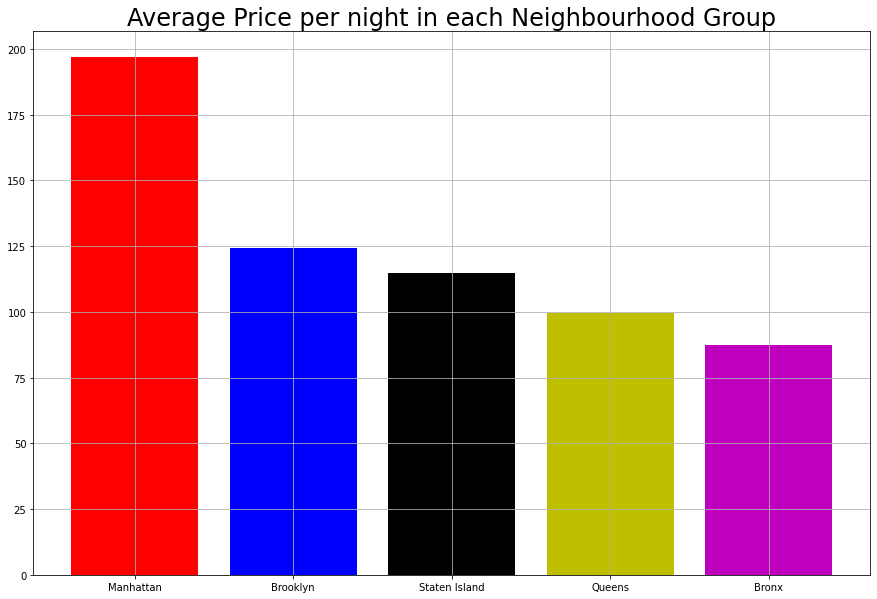

In [48]:
fig, ax = plt.subplots(figsize=(15,10))

plt.bar(avg_price.index.tolist(), avg_price, color=['r', 'b', 'k', 'y', 'm'])
plt.title('Average Price per night in each Neighbourhood Group', fontsize=24)
plt.grid(True)
plt.show()

In [64]:
# What is the most expensive neighbourhood in each neighbourhood_group
air_bnb.groupby(['neighbourhood_group', 'neighbourhood']).mean().nlargest(5, 'price')

id       host_id   latitude  \
neighbourhood_group neighbourhood                                           
Staten Island       Fort Wadsworth  2.030516e+07  1.715301e+06  40.595460   
                    Woodrow         1.798271e+06  9.430973e+06  40.538840   
Manhattan           Tribeca         1.969456e+07  5.274450e+07  40.717744   
Brooklyn            Sea Gate        2.017955e+07  1.168665e+08  40.577119   
Bronx               Riverdale       1.860290e+07  6.890678e+07  40.887352   

                                    longitude       price  minimum_nights  \
neighbourhood_group neighbourhood                                           
Staten Island       Fort Wadsworth -74.060920  800.000000        7.000000   
                    Woodrow        -74.198260  700.000000        7.000000   
Manhattan           Tribeca        -74.007400  490.638418       11.378531   
Brooklyn            Sea Gate       -74.008720  487.857143        4.142857   
Bronx               Riverdale      -73.912064  442.090909        5.363636   

                                    number_of_reviews  reviews_per_month  \
neighbourhood_group neighbourhood                                          
Staten Island       Fort Wadsworth           0.000000                NaN   
                    Woodrow                  0.000000                NaN   
Manhattan           Tribeca                 11.491525           0.834909   
Brooklyn            Sea Gate                 1.428571           0.330000   
Bronx               Riverdale               26.636364           1.320000   

                                    calculated_host_listings_count  \
neighbourhood_group neighbourhood                                    
Staten Island       Fort Wadsworth                        3.000000   
                    Woodrow                               1.000000   
Manhattan           Tribeca                              42.971751   
Brooklyn            Sea Gate                              1.857143   
Bronx               Riverdale                             1.545455   

                                    availability_365  
neighbourhood_group neighbourhood                     
Staten Island       Fort Wadsworth        365.000000  
                    Woodrow                 0.000000  
Manhattan           Tribeca               126.508475  
Brooklyn            Sea Gate               65.571429  
Bronx               Riverdale             160.818182

In [67]:
air_bnb.groupby(['neighbourhood_group', 'neighbourhood'])['price'].max()

neighbourhood_group  neighbourhood
Bronx                Allerton         450
                     Baychester       101
                     Belmont          299
                     Bronxdale        100
                     Castle Hill      128
                                     ... 
Staten Island        Tottenville      299
                     West Brighton    200
                     Westerleigh      103
                     Willowbrook      249
                     Woodrow          700
Name: price, Length: 221, dtype: int64

In [70]:
air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan'].groupby('neighbourhood').mean()['price'].nlargest(1)

neighbourhood
Tribeca    490.638418
Name: price, dtype: float64

In [71]:
air_bnb[air_bnb['neighbourhood_group'] == 'Brooklyn'].groupby('neighbourhood').mean()['price'].nlargest(1)

neighbourhood
Sea Gate    487.857143
Name: price, dtype: float64

In [74]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
air_bnb['minimum_rental'] = air_bnb['price'] * air_bnb['minimum_nights']


In [75]:
air_bnb.nlargest(5, 'minimum_rental')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365,1170000
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,1000000
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,989901
17811,13963005,Gorgeous 2 Bedroom apartment,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350,365,0,NaN,NaN,1,364,857750
44429,34221161,Room with sofa bed or air mattress,9295237,Noelle,Queens,Astoria,40.75593,-73.91276,Private room,2000,365,0,NaN,NaN,2,0,730000


In [81]:
# Who has no (zero) availability with a review count of 100 or more
air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,158
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,500
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0,150
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0,588
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0,130
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0,65
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0,49
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0,48


In [83]:
# If each host rents all of their properties for the night, which 5 make the most that night?
air_bnb.groupby(['host_id', 'host_name']).sum().nlargest(5, 'price')

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
host_id,host_name,,,,,,,,,,
219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588,950453
107434423,Blueground,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580
156158778,Sally,332529233,488.73929,-887.71735,37097,12,1,1.00,144,776,37097
205031545,Red Awning,1415225676,1996.92821,-3624.34656,35294,750,127,21.21,2401,10796,525450
30283594,Kara,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,1164243


In [87]:
# When did Danielle from Queens last receive a review?
air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')].sort_values('last_review', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337,48
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338,48
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341,48
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80,38
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347,54
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333,216
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180,750
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0,50


In [89]:
air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')].groupby('host_id').max()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
host_id,,,,,,,,,,,,,,,,
18051286,13151075,ASTORIA APARTMENT OUTDOOR SPACE,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0,50
26432133,18173787,Sun Room Family Home LGA Airport NO CLEANING FEE,Danielle,Queens,East Elmhurst,40.76389,-73.87007,Shared room,54,1,510,2019-07-08,16.22,5,347,54
154256662,21386105,Quiet & clean 1br haven with balcony near the ...,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180,750
201647469,26814763,One bedroom with full bed / 1 stop from Manhattan,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333,216


In [94]:
# bar chart showing the number of room types in the Bronx
bronx_bnb = air_bnb[air_bnb['neighbourhood_group'] == 'Bronx']
room_counts = bronx_bnb.groupby('room_type').count()['id']
room_counts

room_type
Entire home/apt    379
Private room       652
Shared room         60
Name: id, dtype: int64

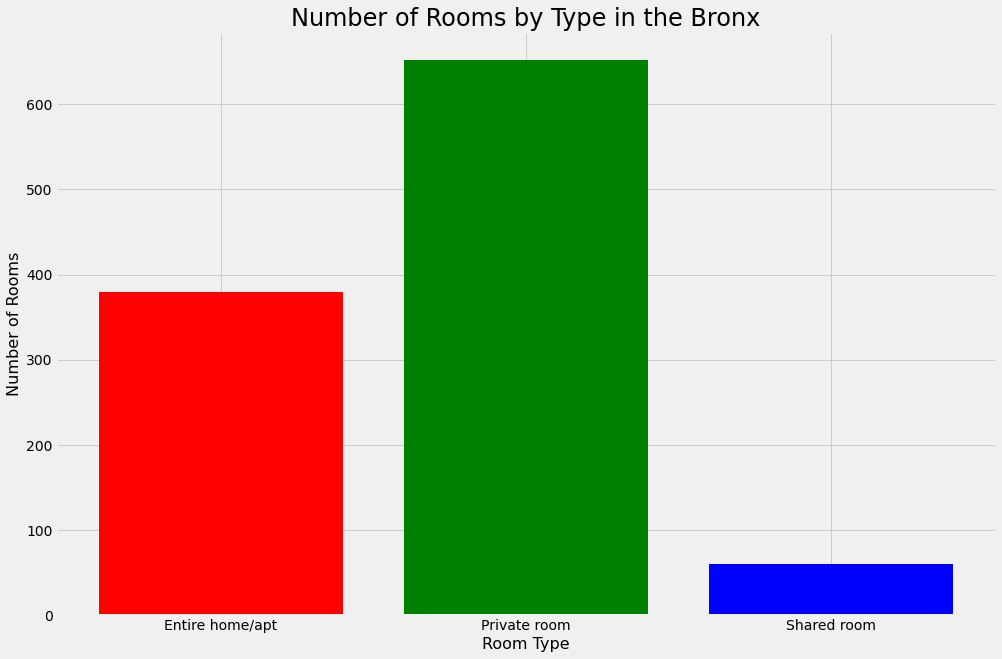

In [96]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.bar(room_counts.index, room_counts, color=['r', 'g', 'b'])
    plt.title('Number of Rooms by Type in the Bronx', fontsize=24)
    plt.xlabel('Room Type', fontsize=16)
    plt.ylabel('Number of Rooms', fontsize=16)
    plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --